# vision

---

## 计算机视觉

fastai库的`视觉模块`包含定义数据集和训练计算机视觉任务模型的所有必要功能。 它包含四个不同的子模块以实现该目标：

* `vision.image`包含Image对象的基本定义以及在幕后使用以将变换应用于此类对象的所有函数。
* `vision.transform`包含我们可用于数据扩充的所有变换。
* `vision.data`包含ImageDataBunch的定义以及为计算机视觉问题轻松构建DataBunch的实用程序功能。
* `vision.learner`允许您使用预训练的CNN骨干构建和微调模型，或从头开始训练随机初始化的模型。

上面的四个模块链接中的每一个都包括该模块的功能的快速概述和示例，以及完整的API文档。 下面，我们将提供具有最常用功能的端到端计算机视觉模型培训。

---

## 最小的训练范例
首先，从fastai库导入您需要的所有内容。

In [3]:
from fastai.vision import *

首先，使用这个小帮助程序在data / mnist_sample中创建一个包含MNIST子集的数据文件夹，它将为您下载：`

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
path

WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample')

由于这包含标准`train`和`valid`文件夹，并且每个类包含一个文件夹，因此您可以在一行中创建一个DataBunch：

In [5]:
data = ImageDataBunch.from_folder(path)

您加载了一个预先训练的模型（来自vision.models），可以进行微调：

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

现在你已经准备好训练了！

In [7]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.138656,0.088763,0.966634,01:15


让我们简要地看一下每个视觉子模块。

---

## 获取数据

用于分类的最重要的`vision.data`是`ImageDataBunch`。 如果你有标签作为子文件夹，那么你可以说：

In [8]:
data = ImageDataBunch.from_folder(path)

它将从列的子文件夹中获取训练中的数据和验证集。 然后，您可以通过获取数据中的相应属性来访问该培训和验证集。

In [10]:
ds = data.train_ds
ds

LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_sample

---

## 图片

这将我们带到`vision.image`，它定义了`Image`类。 我们的数据集将在索引时返回`Image`对象。 图像自动显示在笔记本中：

In [11]:
img,label = ds[0]
img

您可以更改它们的显示方式：

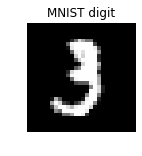

In [12]:
img.show(figsize=(2,2), title='MNIST digit')

你可以用各种方式改变它们：

In [13]:
img.rotate(35)

---

## 数据增加

`vision.transform`让我们进行数据扩充。 最简单的方法是从一组标准变换中进行选择，其中默认值是为照片设计的：

In [15]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



...或创建您想要的确切列表：

In [16]:
tfms = [rotate(degrees=(-20,20)), symmetric_warp(magnitude=(-0.3,0.3))]

您可以使用apply_tfms方法将这些变换应用于图像。

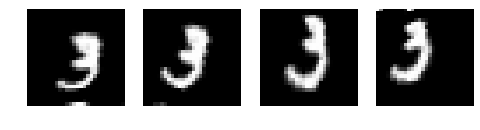

In [17]:
fig,axes = plt.subplots(1,4,figsize=(8,2))
for ax in axes: 
    ds[0][0].apply_tfms(tfms).show(ax=ax)

您可以在一个步骤中使用转换后的训练和验证数据加载器创建一个DataBunch，传入（train_tfms，valid_tfms）元组：

In [18]:
data = ImageDataBunch.from_folder(path, ds_tfms=(tfms, []))

---

## 培训和解释

现在你已经准备好训练模型了。 要创建模型，只需将您的DataBunch和模型创建函数（例如vision.models或torchvision.models提供的函数）传递给cnn_learner，并调用fit：

In [20]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.202340,0.108576,0.960746,01:16


现在我们可以看一下最不正确的图像，以及分类矩阵。

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

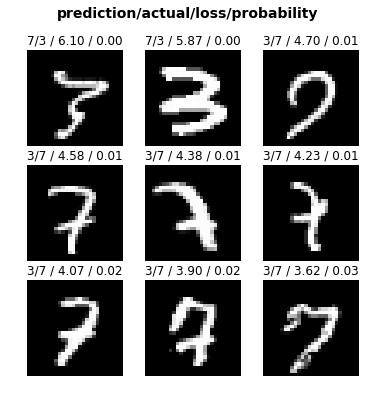

In [22]:
interp.plot_top_losses(9, figsize=(6,6))

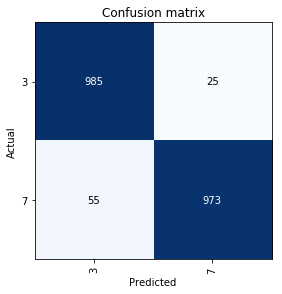

In [23]:
interp.plot_confusion_matrix()

要简单地预测新图像的结果（类型为Image，例如使用open_image打开），只需使用learn.predict。 它返回类，其索引和每个类的概率。

In [24]:
img = learn.data.train_ds[0][0]
learn.predict(img)

(Category 3, tensor(0), tensor([0.9982, 0.0018]))

In [25]:
img